In [1]:
import cv2
import numpy as np
import os
import scipy.io as io
import matplotlib.pyplot as plt
import pickle

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import layers

import random

In [2]:
IMG_SIZE = 128

In [4]:
def channel_shift(img):
    value = random.random()*1+0.5
    img = img * value
    img[:,:,:][img[:,:,:]>255]  = 255
    img[:,:,:][img[:,:,:]<0]  = 0
    img = img.astype(np.uint8)
    return img

def rotation(img, mask, angle):
    angle = int(random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    mask = cv2.warpAffine(mask, M, (w, h))
    return img, mask


In [5]:
def split_video_and_mat(concrete_video_path,concrete_mat_path):
    
    capture = cv2.VideoCapture(concrete_video_path)

    x_train_temp = []
    y_train_temp = []
    
    mat = io.loadmat(concrete_mat_path)
    capture = cv2.VideoCapture(concrete_video_path)
    
    ret, frame = capture.read()
    frames_count = 0
    f_shape = frame.shape
    while ret:
        
        frame = cv2.resize(frame,(IMG_SIZE,IMG_SIZE))
        frame = channel_shift(frame)
        
        joint_masks = []
        
        joint_idx = 0
        joints_number = 15
        for joint_idx in range(joints_number):
            
            mask = np.zeros((IMG_SIZE,IMG_SIZE))
            try:
                x = mat["pos_img"][0][joint_idx][int(frames_count*0.85)]
                y = mat["pos_img"][1][joint_idx][int(frames_count*0.85)]
            except:
                x = mat["pos_img"][0][joint_idx][-1]
                y = mat["pos_img"][1][joint_idx][-1]
                
            x = int(x/(f_shape[1]/IMG_SIZE))
            y = int(y/(f_shape[0]/IMG_SIZE))

            color = (255,255,255)
            mask = cv2.circle(mask,(x,y),10,color, -1)
            
            joint_masks.append(mask/255.0)
        
        frame = np.array(frame)
        joint_masks = np.array(joint_masks)
        joint_masks = np.swapaxes(joint_masks, 0,-1)
        joint_masks = np.swapaxes(joint_masks, 0,1)
        frame, joint_masks = rotation(frame, joint_masks, 50)
        x_train_temp.append(frame)
        y_train_temp.append(joint_masks)
        ret, frame = capture.read()
        frames_count += 1
        
    
    return x_train_temp,y_train_temp

In [6]:
def get_xy_paths(dataset_path, joints_path, activities_to_gen, train):
    x_train = []
    y_train = []
                
    while True:
        for activity_type in os.listdir(joints_path):
            if activity_type in activities_to_gen:
                activity_type_path = os.path.join(joints_path,activity_type)
                for idx, concrete_activity in enumerate(os.listdir(activity_type_path)):
                    if train == True or idx % 3 == 0:
                        concrete_mat_path = os.path.join(activity_type_path,concrete_activity, "joint_positions.mat")
                        concrete_video_path = os.path.join(dataset_path,activity_type, concrete_activity+".avi")

                        x_train_temp, y_train_temp = split_video_and_mat(concrete_video_path,concrete_mat_path)
                        yield x_train_temp, y_train_temp
                        #for frame_idx in range(len(x_train_temp)):
                        #    yield (x_train_temp[frame_idx], y_train_temp[frame_idx])
    

In [7]:
train_set = ["brush_hair","catch","clap","climb_stairs","jump","kick_ball",
        "pick","pour","pullup","push","shoot_ball","shoot_bow",
        "sit","stand","swing_baseball","walk",]
val_set = ["golf", "wave", "shoot_gun", "run", "throw"]

In [8]:
joints_path = "../datasets\\JHMDB\\joint_positions"
dataset_path = "../datasets\\JHMDB\\ReCompress_Videos"
train_gen = get_xy_paths(dataset_path, joints_path, train_set, train = True)
val_gen = get_xy_paths(dataset_path, joints_path, val_set, train = False)

In [31]:
x, y = next(train_gen)
x = np.array(x[:16])
y = np.array(y[:16])


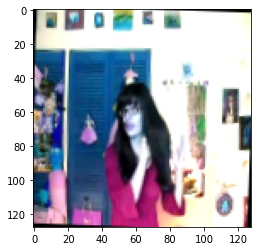

In [32]:
plt.imshow(x[2])

In [33]:
img = x[2]

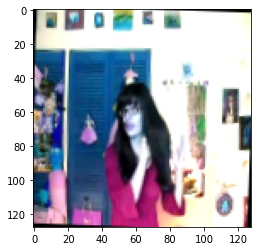

In [34]:
plt.imshow(img)

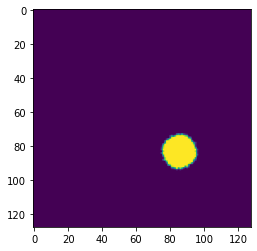

In [53]:
plt.imshow(y[0,:,:,4])

In [81]:
img1 = np.flip(img,1)

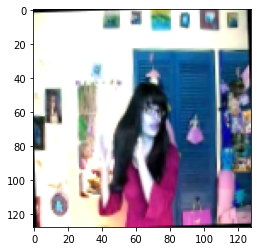

In [82]:
plt.imshow(img1)

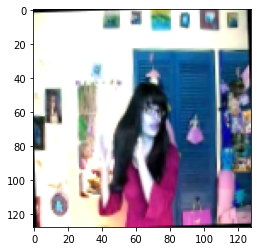

In [36]:
plt.imshow(img1)

In [346]:
def rotation(img, angle):
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    return img

In [212]:
a = rotation(y[0], 360)

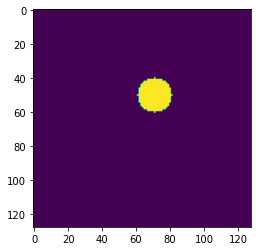

In [213]:
plt.imshow(a[:,:,0])

In [184]:
y.shape

(16, 15, 128, 128)

In [189]:
y = np.swapaxes(y, 1, 2)

In [190]:
y.shape

(16, 128, 128, 15)